In [3]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
#from pandas.tools.plotting import parallel_coordinates

In [4]:
df = pd.read_csv('spi_matches.csv')
print(df)

       season        date  league_id                    league  \
0        2016  2016-07-09       7921   FA Women's Super League   
1        2016  2016-07-10       7921   FA Women's Super League   
2        2016  2016-07-10       7921   FA Women's Super League   
3        2016  2016-07-16       7921   FA Women's Super League   
4        2016  2016-07-17       7921   FA Women's Super League   
...       ...         ...        ...                       ...   
54408    2021  2022-05-29       1871  Spanish Segunda Division   
54409    2021  2022-05-29       1871  Spanish Segunda Division   
54410    2021  2022-05-29       1871  Spanish Segunda Division   
54411    2021  2022-05-29       1871  Spanish Segunda Division   
54412    2021  2022-05-29       1871  Spanish Segunda Division   

                  team1                team2   spi1   spi2   prob1   prob2  \
0       Liverpool Women              Reading  51.56  50.42  0.4389  0.2767   
1         Arsenal Women  Notts County Ladies  46.61

In [5]:
df.head()

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,2016,2016-07-09,7921,FA Women's Super League,Liverpool Women,Reading,51.56,50.42,0.4389,0.2767,...,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,2016-07-10,7921,FA Women's Super League,Arsenal Women,Notts County Ladies,46.61,54.03,0.3572,0.3608,...,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,2016-07-10,7921,FA Women's Super League,Chelsea FC Women,Birmingham City,59.85,54.64,0.4799,0.2487,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,2016-07-16,7921,FA Women's Super League,Liverpool Women,Notts County Ladies,53.00,52.35,0.4289,0.2699,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,2016-07-17,7921,FA Women's Super League,Chelsea FC Women,Arsenal Women,59.43,60.99,0.4124,0.3157,...,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.tail()

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
54408,2021,2022-05-29,1871,Spanish Segunda Division,Real Oviedo,UD Ibiza,34.56,31.57,0.4551,0.2523,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54409,2021,2022-05-29,1871,Spanish Segunda Division,Lugo,Málaga,31.27,24.31,0.4919,0.2277,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54410,2021,2022-05-29,1871,Spanish Segunda Division,Amorebieta,SD Ponferradina,25.46,30.73,0.3500,0.3515,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54411,2021,2022-05-29,1871,Spanish Segunda Division,Tenerife,FC Cartagena,36.71,32.30,0.4737,0.2413,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54412,2021,2022-05-29,1871,Spanish Segunda Division,Burgos,Girona FC,27.05,40.04,0.2826,0.4280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_epl = df[df.league=='Barclays Premier League']
df_epl.shape

(2280, 23)

In [19]:
df_epl_arsenal = df_epl[df_epl.team1=='Arsenal']
df_epl_arsenal.shape
# df_epl_arsenal.head()

(114, 23)

In [20]:
df_epl_arsenal.head()

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
26,2016,2016-08-14,2411,Barclays Premier League,Arsenal,Liverpool,82.55,77.44,0.5551,0.2115,...,62.7,63.9,3.0,4.0,1.14,1.84,1.19,1.49,3.15,4.20
138,2016,2016-09-10,2411,Barclays Premier League,Arsenal,Southampton,81.72,67.78,0.6503,0.1334,...,65.5,22.8,2.0,1.0,1.93,1.06,2.88,0.70,2.10,1.05
297,2016,2016-09-24,2411,Barclays Premier League,Arsenal,Chelsea,83.19,81.10,0.4983,0.2563,...,67.0,59.5,3.0,0.0,1.68,0.68,2.76,1.31,3.15,0.00
407,2016,2016-10-15,2411,Barclays Premier League,Arsenal,Swansea City,84.98,58.68,0.7816,0.0671,...,40.1,30.2,3.0,2.0,3.80,2.21,2.58,1.69,3.15,2.10
472,2016,2016-10-22,2411,Barclays Premier League,Arsenal,Middlesbrough,85.58,53.15,0.7914,0.0595,...,75.2,38.4,0.0,0.0,0.62,1.87,3.47,0.77,0.00,0.00


In [26]:
win_list = []

for index, row in df_epl_arsenal.iterrows():
    if(row["score1"] > row["score2"]):
        win_list.append(1)
    else:
        win_list.append(0)
#print(win_list)

[0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [27]:
loss_list = []

for index, row in df_epl_arsenal.iterrows():
    if(row["score1"] < row["score2"]):
        loss_list.append(1)
    else:
        loss_list.append(0)
print(len(win_list))

114


In [28]:
draw_list = []

for index, row in df_epl_arsenal.iterrows():
    if(row["score1"] == row["score2"]):
        draw_list.append(1)
    else:
        draw_list.append(0)
print(len(draw_list))

114


In [30]:
df_epl_arsenal['Arsenal_won'] = win_list
df_epl_arsenal['Arsenal_lost'] = loss_list
df_epl_arsenal['Arsenal_drew'] = draw_list

c:\users\arvin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\arvin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\arvin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [32]:
df_epl_arsenal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 26 to 54363
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   season        114 non-null    int64  
 1   date          114 non-null    object 
 2   league_id     114 non-null    int64  
 3   league        114 non-null    object 
 4   team1         114 non-null    object 
 5   team2         114 non-null    object 
 6   spi1          114 non-null    float64
 7   spi2          114 non-null    float64
 8   prob1         114 non-null    float64
 9   prob2         114 non-null    float64
 10  probtie       114 non-null    float64
 11  proj_score1   114 non-null    float64
 12  proj_score2   114 non-null    float64
 13  importance1   105 non-null    float64
 14  importance2   105 non-null    float64
 15  score1        106 non-null    float64
 16  score2        106 non-null    float64
 17  xg1           106 non-null    float64
 18  xg2           106 non-null 

In [35]:
df_epl_arsenal.head()

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,Arsenal_won,Arsenal_lost,Arsenal_drew
26,2016,2016-08-14,2411,Barclays Premier League,Arsenal,Liverpool,82.55,77.44,0.5551,0.2115,...,4.0,1.14,1.84,1.19,1.49,3.15,4.20,0,1,0
138,2016,2016-09-10,2411,Barclays Premier League,Arsenal,Southampton,81.72,67.78,0.6503,0.1334,...,1.0,1.93,1.06,2.88,0.70,2.10,1.05,1,0,0
297,2016,2016-09-24,2411,Barclays Premier League,Arsenal,Chelsea,83.19,81.10,0.4983,0.2563,...,0.0,1.68,0.68,2.76,1.31,3.15,0.00,1,0,0
407,2016,2016-10-15,2411,Barclays Premier League,Arsenal,Swansea City,84.98,58.68,0.7816,0.0671,...,2.0,3.80,2.21,2.58,1.69,3.15,2.10,1,0,0
472,2016,2016-10-22,2411,Barclays Premier League,Arsenal,Middlesbrough,85.58,53.15,0.7914,0.0595,...,0.0,0.62,1.87,3.47,0.77,0.00,0.00,0,0,1


(19, 26)

In [53]:
df_epl_arsenal_2016 = df_epl_arsenal[df_epl_arsenal['season'] == 2016]

list_2016 = []

a1_2016 = 0
a2_2016 = 0
a3_2016 = 0


for index, row in df_epl_arsenal_2016.iterrows():
    if(row["Arsenal_won"] == 1):
        a1_2016 += 1
    if(row["Arsenal_lost"] == 1):
        a2_2016 += 1
    if(row["Arsenal_drew"] == 1):
        a3_2016 += 1
        
list_2016 = [a1_2016, a2_2016, a3_2016]
print(list_2016)

[14, 2, 3]


In [55]:
df_epl_arsenal_2017 = df_epl_arsenal[df_epl_arsenal['season'] == 2017]

list_2017 = []

a1_2017 = 0
a2_2017 = 0
a3_2017 = 0


for index, row in df_epl_arsenal_2017.iterrows():
    if(row["Arsenal_won"] == 1):
        a1_2017 += 1
    if(row["Arsenal_lost"] == 1):
        a2_2017 += 1
    if(row["Arsenal_drew"] == 1):
        a3_2017 += 1
        
list_2017 = [a1_2017, a2_2017, a3_2017]
print(list_2017)

[15, 2, 2]


In [57]:
df_epl_arsenal_2018 = df_epl_arsenal[df_epl_arsenal['season'] == 2018]

list_2018 = []

a1_2018 = 0
a2_2018 = 0
a3_2018 = 0


for index, row in df_epl_arsenal_2018.iterrows():
    if(row["Arsenal_won"] == 1):
        a1_2018 += 1
    if(row["Arsenal_lost"] == 1):
        a2_2018 += 1
    if(row["Arsenal_drew"] == 1):
        a3_2018 += 1
        
list_2018 = [a1_2018, a2_2018, a3_2018]
print(list_2018)

[14, 2, 3]


In [59]:
df_epl_arsenal_2019 = df_epl_arsenal[df_epl_arsenal['season'] == 2019]

list_2019 = []

a1_2019 = 0
a2_2019 = 0
a3_2019 = 0


for index, row in df_epl_arsenal_2019.iterrows():
    if(row["Arsenal_won"] == 1):
        a1_2019 += 1
    if(row["Arsenal_lost"] == 1):
        a2_2019 += 1
    if(row["Arsenal_drew"] == 1):
        a3_2019 += 1
        
list_2019 = [a1_2019, a2_2019, a3_2019]
print(list_2019)

[10, 3, 6]


In [61]:
df_epl_arsenal_2020 = df_epl_arsenal[df_epl_arsenal['season'] == 2020]

list_2020 = []

a1_2020 = 0
a2_2020 = 0
a3_2020 = 0


for index, row in df_epl_arsenal_2020.iterrows():
    if(row["Arsenal_won"] == 1):
        a1_2020 += 1
    if(row["Arsenal_lost"] == 1):
        a2_2020 += 1
    if(row["Arsenal_drew"] == 1):
        a3_2020 += 1
        
list_2020 = [a1_2020, a2_2020, a3_2020]
print(list_2020)

[8, 7, 4]


In [68]:
df_epl_arsenal_2021 = df_epl_arsenal[df_epl_arsenal['season'] == 2021]

list_2021 = []

a1_2021 = 0
a2_2021 = 0
a3_2021 = 0


for index, row in df_epl_arsenal_2021.iterrows():
    if(row["Arsenal_won"] == 1):
        a1_2021 += 1
    if(row["Arsenal_lost"] == 1):
        a2_2021 += 1
    if(row["Arsenal_drew"] == 1):
        a3_2021 += 1
        
list_2021 = [a1_2021, a2_2021, a3_2021]
print(list_2021)

[7, 2, 2]


In [69]:
list_win = [a1_2016,a1_2017,a1_2018,a1_2019,a1_2020,a1_2021]
list_loss = [a2_2016,a2_2017,a2_2018,a2_2019,a2_2020,a2_2021]
list_draw = [a3_2016,a3_2017,a3_2018,a3_2019,a3_2020,a3_2021]

In [70]:
print(list_win, list_loss, list_draw)

[14, 15, 14, 10, 8, 7] [2, 2, 2, 3, 7, 2] [3, 2, 3, 6, 4, 2]


In [65]:
from pandas.plotting import parallel_coordinates

In [67]:
plt.figure(figsize = (12,8))

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [79]:
d = {'season':[2016, 2017, 2018, 2019, 2020, 2021],'Arsenal_won': list_win, 'Arsenal_lost': list_loss, 'Arsenal_drew': list_draw}

dnew = pd.DataFrame(d)
dnew.head()



,season,Arsenal_won,Arsenal_lost,Arsenal_drew
0,2016,14,2,3
1,2017,15,2,2
2,2018,14,2,3
3,2019,10,3,6
4,2020,8,7,4


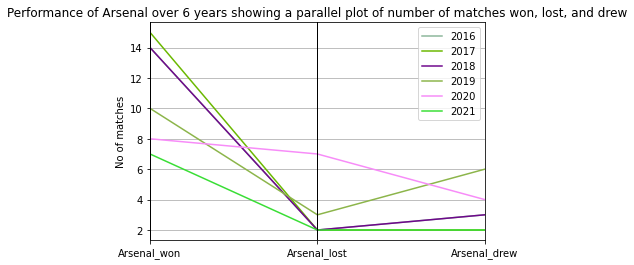

In [88]:
parallel_coordinates(dnew, 'season')
plt.legend()
plt.ylabel('No of matches')
plt.title('Performance of Arsenal over 6 years showing a parallel plot of number of matches won, lost, and drew')
plt.savefig('parallelplot.jpg')
plt.show()
